<a href="https://colab.research.google.com/github/zwt4pb/linearRegression/blob/main/4linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

**Q0.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
- A model is linear when the relationship between variables has a pattern. It often forms a line.
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
- Since one category is always dropped to avoid perfect collinearity, the model intercept represents the baseline value for this reference category, and the coefficient for each dummy variable shows how much the outcome differs from that baseline when in the specified category.
3. Can linear regression be used for classification? Explain why, or why not.
- Linear regression is not the best tool for classification. It produces continuous outputs rather than discrete class labels. Typical classification models like logistic regression are usually better to use.
4. What are signs that your linear model is over-fitting?
- Overfitting in a linear model may be indicated by high performance on the training data but poor performance on new, unseen data. Signs: an unusually high R-squared on training data, a difference between training and testing errors, and high model complexity relative to the size of the dataset.
5. Clearly explain multi-colinearity using the two-stage least squares technique.
- Multicollinearity occurs when two or more predictors are highly correlated, making it difficult for the model to estimate unique coefficients for each predictor. In 2SLS, we address this by first using instruments to isolate the variation in each predictor. In the first stage, each endogenous predictor is regressed on the instruments, and in the second stage, the predicted values are used in the main regression, reducing multicollinearity and improving coefficient stability.
6. What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$?
- Two ways to incorporate nonlinearity are:
 (1) adding polynomial terms to allow for curved relationships or (2) transforming variables with functions like log to capture nonlinear effects while preserving linearity in the parameters.
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?
- The intercept represents the predicted value of the outcome when all predictors are zero. A slope coefficient shows the change in the outcome for a one-unit increase in a predictor, holding all else constant. For a dummy variable, the coefficient indicates the difference in the outcome between the specific category and the reference category, holding other variables constant.

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('/content/Q1_clean.csv')
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [ ]:
#1
df.loc[:,['Price','Neighbourhood '] ].groupby('Neighbourhood ').describe()

Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                         
                    max  
Neighbourhood            
Bronx             244.0  
Brooklyn         4500.0  
Manhattan       10000.0  
Queens            950.0  
Staten Island    5000.0

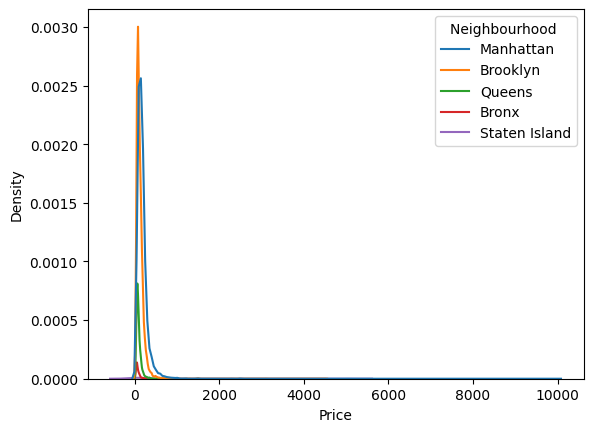

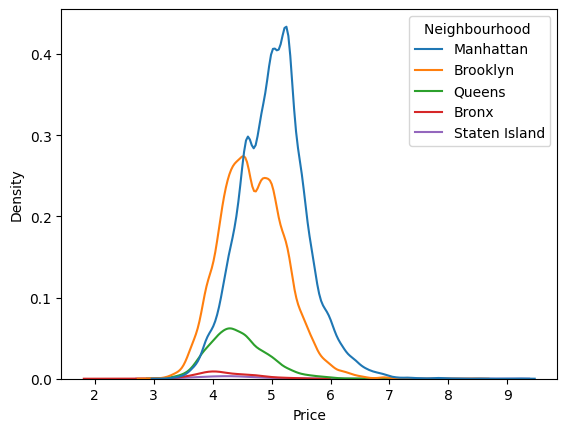

In [ ]:
sns.kdeplot(x=df['Price'], hue=df['Neighbourhood '])
plt.show()
sns.kdeplot(x=np.log(df['Price']), hue=df['Neighbourhood '])
plt.show()

Manhattan is the most expensive neighborhood with a mean of $183/night.

In [ ]:
#2
x = pd.get_dummies(df['Neighbourhood '], dtype='int')
y = df['Price']

from sklearn import linear_model

reg = linear_model.LinearRegression(fit_intercept=False).fit(x,y)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667



Part 1 means equal the coefficients of the regression on the neighborhood dummy. With no other variables, the regression simply calculates each group’s average. When other controls are added, the dummy variable coefficients represent each group’s mean, adjusted for those factors.

In [ ]:
#3
x = pd.get_dummies(df['Neighbourhood '], dtype='int', drop_first = True)
y = df['Price']
from sklearn import linear_model
reg = linear_model.LinearRegression().fit(x,y)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


In [ ]:
print("Intercept:")
print(reg.intercept_)

Intercept:
75.27649769585331


The Bronx is dropped as the reference category, making its previous coefficient the intercept in this regression. Now, all coefficients are relative to the Bronx. Adding each coefficient to the intercept gives the values from the prior regression.

In [ ]:
results = pd.DataFrame({'variable':reg.feature_names_in_,
                        'coefficient': reg.coef_+reg.intercept_})
results

,variable,coefficient
0,Brooklyn,127.747378
1,Manhattan,183.664286
2,Queens,96.857233
3,Staten Island,146.166667


In [ ]:
#4
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood '] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

y_hat = reg.predict(Z_test)
print('R-squared: ', reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

R-squared:  0.06701086106947296
RMSE:  125.01092061382933


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


The coefficient is 1.032257. The priciest rental is a 100-rated property in Manhattan, costing around $192.64 per night.

In [ ]:
#5
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'],
                    pd.get_dummies(X_train['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_train['Room Type'], dtype='int')],
                    axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], pd.get_dummies(X_test['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_test['Room Type'], dtype='int')],
                    axis = 1)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)
y_hat = reg.predict(Z_test)
print('R-squared: ', reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

R-squared:  0.22035348129282306
RMSE:  114.27692123130633


,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


A 100-rated home in Manhattan would cost $170.57.

6. In part 4, the coefficient was 1.03, and in part 5 it was 0.63. In MLR, you first regress your variables of interest on all other variables. Then, you use the residuals from these regressions to assess their relationship. In part 4, we didn't include room type like we did in part 5. This shows that some price variation by rating and neighborhood is due to room types. The coefficient shrinks when room type is controlled for, as the predictive strength of other variables decreases due to overlapping effects with room type.